<a href="https://colab.research.google.com/github/LFelypeAzevedo/Alura-Cursos/blob/main/Data%20Visualization%3A%20criando%20gr%C3%A1ficos%20com%20bibliotecas%20Python/Desafio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}

# Criando DataFrame
import pandas as pd
df = pd.DataFrame(vendas_2022, index=lojas)

In [21]:
df = df.assign(Total=list(sum(df.loc[loja]) for loja in lojas))

In [105]:
df.values[:,0:12]

array([[100, 120, 150, 180, 220, 230, 250, 260, 240, 220, 400, 300],
       [ 80,  90, 100, 110, 190, 150, 170, 180, 160, 140, 220, 350],
       [150, 170, 200, 230, 350, 280, 300, 310, 290, 270, 350, 400],
       [ 50,  60,  80,  90, 200, 120, 140, 150, 130, 110, 190, 250]])

In [63]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

colors = ['tab:red','tab:orange','tab:green']
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

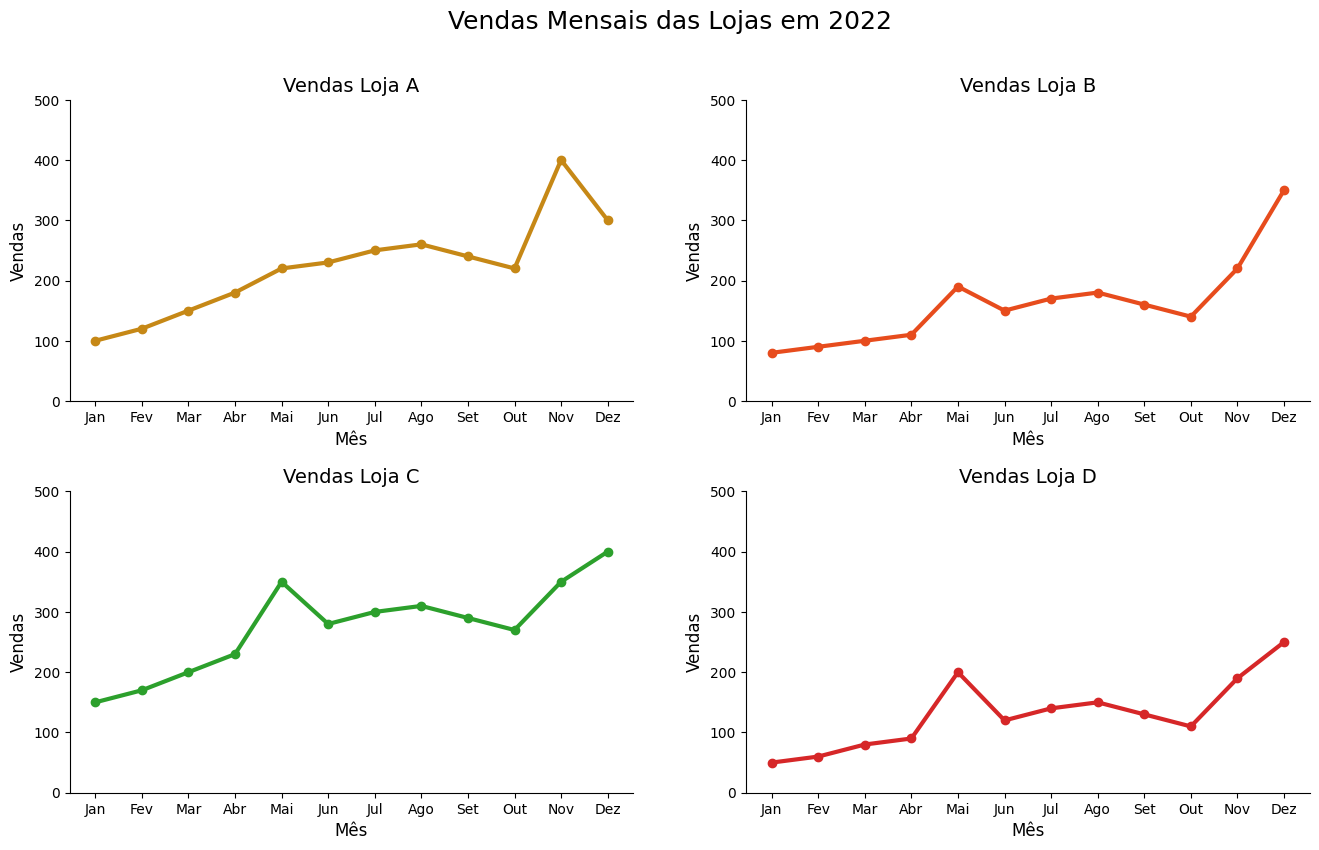

In [106]:
import matplotlib.pyplot as plt
import numpy as np

ymin = 0
ymax = (np.ceil(np.amax(df.values[:,0:11])/100)+1)*100

fig,axs = plt.subplots(2,2,figsize=(16,9))
fig.subplots_adjust(hspace=0.3,wspace=0.2)
fig.suptitle('Vendas Mensais das Lojas em 2022', fontsize=18,)

for i,ax in enumerate(axs.flat):
  ax.plot(df.iloc[i,0:12],lw=3,color=cmap1((df.Total[lojas[i]]-min(df.Total))/(max(df.Total)-min(df.Total))),marker='o')
  ax.set_title('Vendas Loja {0}'.format(lojas[i]),fontsize=14)
  ax.set_xlabel('Mês',fontsize=12)
  ax.set_ylabel('Vendas',fontsize=12)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.set_ylim(ymin,ymax)

plt.show()

In [81]:
df_sorted = df.sort_values('Total',ascending=True)

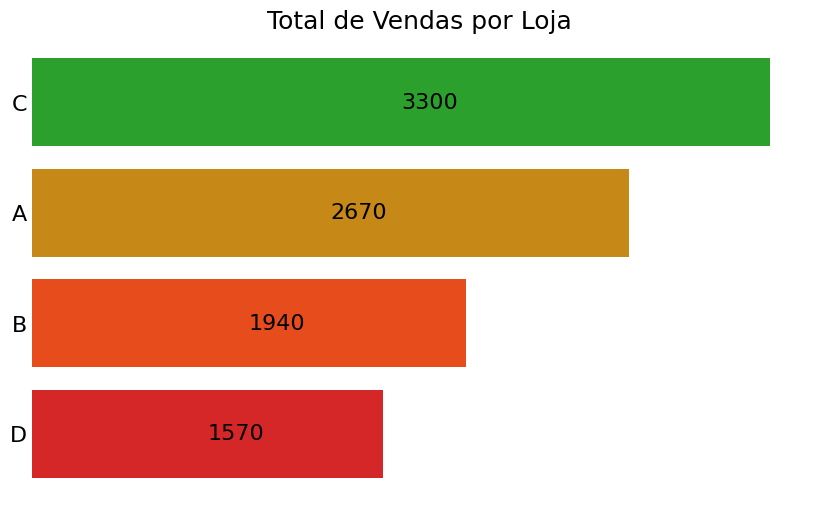

In [100]:
import matplotlib.pyplot as plt

cores = list((cmap1((df_sorted.Total[loja]-min(df_sorted.Total))/(max(df_sorted.Total)-min(df_sorted.Total)))) for loja in df_sorted.index)

fig,ax = plt.subplots(figsize=(10,6))

ax.barh(df_sorted.index,df_sorted.Total,color=cores)
ax.set_title("Total de Vendas por Loja", fontsize="18")

for i,v in enumerate(df_sorted['Total']):
  ax.text(v//2,i,str(v),color='black',fontsize=16,ha='left',va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length=0, labelsize=16)
plt.show()